#Test from Research Paper for The Jumping Spiders Team

Following the techniques for text-segmentation and parsing developed in [*Utilizing Artificial Intelligence for Text Segmentation from Images*](https://web.p.ebscohost.com/ehost/pdfviewer/pdfviewer?vid=0&sid=0531eae4-3f69-483c-b4a5-b8f728de4b78%40redis), I hope to find an effective way to preprocess, train, and test the model while yeilding high success rates.

> These tests were conducted by Alexia Rangel K.

---


# Data Collection and Input
Just used images that were collected from the Lepidorma library and had legible machine text



In [1]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/data_folder/tjs-butterfly-imagetotext/
%ldir

/content/drive/MyDrive/Colab Notebooks/data_folder/tjs-butterfly-imagetotext
drwx------ 2 root      4096 Feb 10 21:32 Butterflies/
drwx------ 2 root      4096 Feb 11 01:13 train_images/


In [3]:
import pandas as pd #Dataframe stuff
import tensorflow as tf #Tensorflow is a machine learning dataset used for building Neural Nets
import os #Used to navigate through file structures
import cv2
from matplotlib import pyplot as plt

There's first a few checks/reformatting we needed to make to the data to make sure it was ready for preprocessing/training. These only had to happen once.

In [4]:
#train_dir = 'train_images'

In [5]:
def checkExt (data_dir):
  #Quick Reviewing the Extensions
  count = 0;
  for image in os.listdir(data_dir):
    #For each image in the tjs directory
    image_path = os.path.join(data_dir, image)
    count = count + 1
    try:
      img = cv2.imread(image_path)
      ext = image_path.lower().endswith(('.jpg', '.jpeg'))    #ISSUE HERE FOR SOME REASON
      if not ext:
        print('Image not in ext list {}'.format(image_path))
    except Exception as e:
      print('Issue with image {}, {}'.format(image_path, e))
  print('Counted', count, 'images')

In [6]:
# Previous Operation: to check that all the files in data folder are a .jpg or .jpeg
# checkExt(butterfly_dir)
# checkExt(train_dir)

In [7]:
# Previous Operation: to add the path of the images to the end of each corresponding line
# image_files = sorted(os.listdir(train_dir))
# train_df_imagePath = train_df
# train_df_imagePath.reset_index(drop=True, inplace=True)
# train_df_imagePath['image_path'] = None

# for img in image_files:
#   img_path = os.path.join(train_dir, img)
#   img_name, ext= os.path.splitext(img)
#   train_df_imagePath.loc[train_df_imagePath['image_id'] == img_name, 'image_path'] = img_path

# train_df_imagePath.head(20)

In [8]:
# Previous Operation: saving the dataframe
# train_df_imagePath.to_csv('annot_path.csv')

Now onto our real stuff

In [9]:
# now we're loading this dataframe
text_df = pd.read_csv('annot_path.csv')
text_df.head(20)

,Unnamed: 0,id,image_id,bbox,utf8_string,image_path
0,0,a4ea732cd3d5948a_1,a4ea732cd3d5948a,"[525.83, 3.4, 197.64, 33.94]",Performance,train_images/a4ea732cd3d5948a.jpg
1,1,a4ea732cd3d5948a_2,a4ea732cd3d5948a,"[534.67, 64.68, 91.22, 38.19]",Sport,train_images/a4ea732cd3d5948a.jpg
2,2,a4ea732cd3d5948a_3,a4ea732cd3d5948a,"[626.95, 63.62, 96.52, 31.82]",Watch,train_images/a4ea732cd3d5948a.jpg
3,3,a4ea732cd3d5948a_4,a4ea732cd3d5948a,"[577.4, 141.87, 147.13, 43.1]",...period.,train_images/a4ea732cd3d5948a.jpg
4,4,a4ea732cd3d5948a_5,a4ea732cd3d5948a,"[391.03, 163.9, 60.82, 38.65]",.,train_images/a4ea732cd3d5948a.jpg
5,5,a4ea732cd3d5948a_6,a4ea732cd3d5948a,"[455.64, 204.45, 21.97, 24.82]",400,train_images/a4ea732cd3d5948a.jpg
6,6,a4ea732cd3d5948a_7,a4ea732cd3d5948a,"[474.58, 234.95, 17.24, 24.25]",300,train_images/a4ea732cd3d5948a.jpg
7,7,a4ea732cd3d5948a_8,a4ea732cd3d5948a,"[506.48, 263.69, 25.42, 41.99]",15,train_images/a4ea732cd3d5948a.jpg
8,8,a4ea732cd3d5948a_9,a4ea732cd3d5948a,"[346.4, 177.05, 54.56, 38.48]",12,train_images/a4ea732cd3d5948a.jpg
9,9,a4ea732cd3d5948a_10,a4ea732cd3d5948a,"[364.49, 163.27, 19.82, 16.08]",60,train_images/a4ea732cd3d5948a.jpg


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [11]:
#split the data into test and train
X = text_df.drop(['utf8_string', 'bbox', 'Unnamed: 0', 'id', 'image_id'], axis=1)
y = text_df[['utf8_string', 'bbox']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.head(10)

,image_path
343049,train_images/9dcc191d7f9b06f5.jpg
734138,train_images/a35b6656ae730773.jpg
436771,train_images/de43eecf3230c1a6.jpg
839706,train_images/42259ff6c3ad8936.jpg
52874,train_images/04a575f307c7b89a.jpg
882111,train_images/28ab9422a649a4a7.jpg
900536,train_images/cac4e67a0b44d479.jpg
430039,train_images/954a6c4bdd79d8b6.jpg
571895,train_images/bc05e222ee570757.jpg
472322,train_images/687f2da23ac18260.jpg


In [13]:
y_train.head(10)

,utf8_string,bbox
343049,Home,"[161.13, 137.06, 58.05, 24.65]"
734138,ROSE,"[741.17, 179.89, 39.59, 37.92]"
436771,.,"[127.87, 0.17, 20.0, 9.09]"
839706,Edy,"[612.19, 389.27, 15.6, 9.2]"
52874,E,"[151.24, 433.36, 15.4, 19.64]"
882111,FIMITED,"[226.29, 674.44, 29.71, 20.92]"
900536,Eddie,"[359.18, 44.88, 131.02, 62.95]"
430039,.,"[683.89, 385.2, 14.29, 4.57]"
571895,Le,"[597.06, 454.34, 20.76, 17.13]"
472322,1,"[414.35, 87.03, 5.4, 15.3]"


#Pre-processing


*   image binarization using Otsu's method
*   image smoothing using Gaussian filter
*   image enhancement using Contrast Limited Adaptive Histogram Equalization (CLAHE) algorithm
*   crop Image

I'm watching [this video](https://www.youtube.com/watch?v=ADV-AjAXHdc) to do better ocr




In [14]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from PIL import Image, ImageFilter
import numpy as np
from google.colab.patches import cv2_imshow as show_img
from scipy.ndimage import gaussian_filter
from copy import deepcopy

In [15]:
def inverse(image):
  return cv2.bitwise_not(image)

In [16]:
def grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [24]:
def binarization(image):
  # Apply Adaptive Thresholding: this is supposed to be better for images with variable lighting and conditions
  # https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
  image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                              cv2.THRESH_BINARY,11,2)
  # _, image = cv2.threshold(image, 200, 230, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  return image

In [17]:
def noise_removal(image):
  kernal = np.ones((1, 1), np.uint8)
  image = cv2.dilate(image, kernal, iterations=1)
  kernal = np.ones((1, 1), np.uint8)
  image = cv2.erode(image, kernal, iterations=1)
  image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernal)
  image = cv2.medianBlur(image, 3)

  # Apply Gaussian filter (COMPARE TO MEDIANBLUR)
  # sigma = 2  # Standard deviation for Gaussian kernel (higher = more blur)
  # image = gaussian_filter(image, sigma=sigma)

  return image

In [19]:
def thin_font(image):
  image = cv2.bitwise_not(image)
  kernal = np.ones((2, 2), np.uint8)
  image = cv2.erode(image, kernal, iterations=1)
  image = cv2.bitwise_not(image)
  return image

In [20]:
def thick_font(image):
  image = cv2.bitwise_not(image)
  kernal = np.ones((2, 2), np.uint8)
  image = cv2.dilate(image, kernal, iterations=1)
  image = cv2.bitwise_not(image)
  return image

In [56]:
def blurring(image):
  # Apply Gaussian filter
  sigma = 0.5  # Standard deviation for Gaussian kernel (higher = more blur)
  return gaussian_filter(image, sigma=sigma)

In [81]:
def imgEnhancement(image):
  # Apply CLAHE Algorithm
  clahe = cv2.createCLAHE(clipLimit=5)
  return clahe.apply(image) + 10

In [85]:
def imgPreprocessing(img_path):
  image = cv2.imread(img_path)

  # image = inverse(image)
  # show_img(image)

  image = grayscale(image)
  # show_img(image)

  image = blurring(image)
  #show_img(image)

  # image = imgEnhancement(image)
  # show_img(image)

  image = binarization(image)
  show_img(image)

  # image = noise_removal(image)
  # show_img(image)

  # image = thin_font(image)
  # show_img(image)

  # image = thick_font(image)
  # show_img(image)

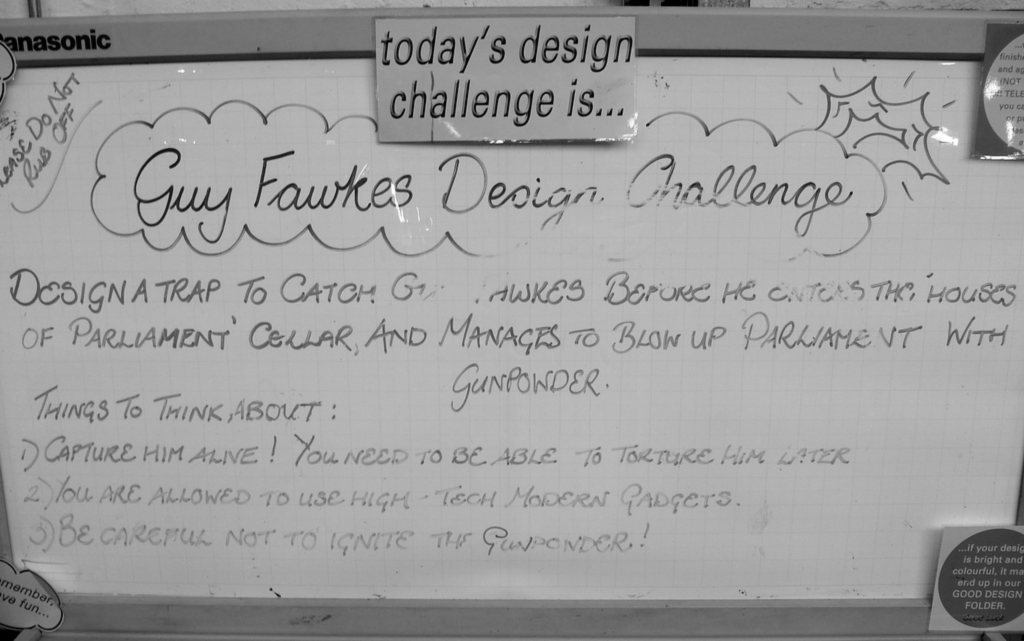

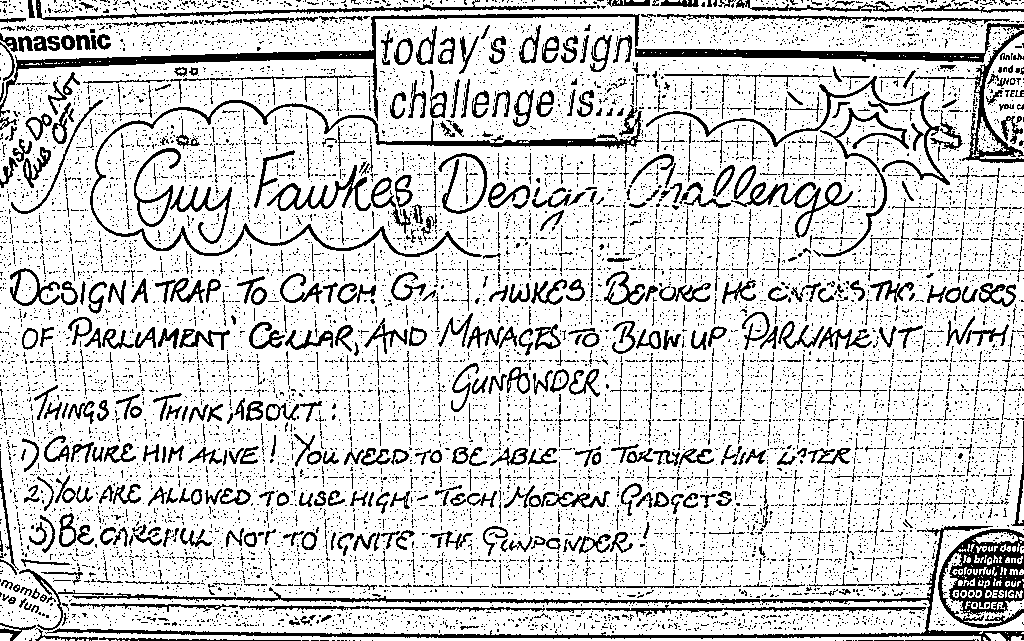

In [90]:
# test = imgPreprocessing("train_images/4bf43a7b2a898044.jpg")
# test = imgPreprocessing("train_images/0a3f9715e6677a08.jpg")
test = imgPreprocessing("train_images/0b9e647fccd97986.jpg")

In [ ]:
def img_to_array(img_path):
    img_array = imgPreprocessing(img_path)
    return img_array

In [ ]:
rows, cols = train_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 1052354
Number of columns: 6


In [ ]:
#Actually going through and preprocessing every image
train_imageData = train_data.iloc[:526177].copy(deep=True);
train_imageData['image_data'] = None
image_files = sorted(os.listdir(train_dir))

train_imageData['image_data'] = train_imageData['image_path'].apply(img_to_array)

In [ ]:
train_imageData.head(50)



---



---



---


# After this is a lot of testing that isn't done, don't cross over!

In [ ]:
from sklearn.model_selection import train_test_split

# Extract image data and labels
X = np.array(df['processed_image'].tolist())  # Convert list of images to NumPy array
y = np.array(df['word'].tolist())  # Text labels

# Normalize image data
X = X.reshape(-1, 256, 256, 1)  # Ensure correct shape for CNN input
X = X.astype('float32') / 255.0  # Normalize pixel values

# Encode text labels (one-hot encoding)
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert words to numerical labels
y_encoded = to_categorical(y_encoded)  # One-hot encoding

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert into TensorFlow dataset format
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

Attempting to dynamically feed images into a model

In [ ]:
print(train_imageData.iloc[0:74])

In [ ]:
train_imageData.to_csv('annot_imageData.csv')

# Text Segmentation Algorithms


# Evaluations
